# DAT210x - Programming with Python for DS

## Module6- Lab4

This code is intentionally missing! Read the directions on the course lab page!

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
iterations = 5000 
# INFO: You can set this to false if you want to draw the full square matrix
FAST_DRAW = True
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)



In [3]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print('\n\n' + wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        
        # .. your code here ..
        model.fit(X_train, y_train)
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:

        # .. your code here ..
        score = model.score(X_test, y_test)
        
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))



Load up the wheat dataset into dataframe 'X'. Verify you did it properly. Indices should not be doubled, nor weir headers... Your code here...

In [4]:
X = pd.read_csv('Datasets/wheat.data', index_col = 0)
X.tail()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,canadian
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,canadian


An easy way to show which rows have nans in them

In [5]:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


Go ahead and drop any rows with Nan

In [6]:
X.dropna(axis=0, inplace=True)

In the future, you might try setting the Nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataset into variable 'y' then remove them from 'X'. Encode the labels, using the .map() trick we showed you in Module 5 -- canadian: 0, kama: 1, rosa: 2
-- your code here --

In [7]:
y = X['wheat_type'].copy()
X.drop(['wheat_type'], axis = 1, inplace = True)
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

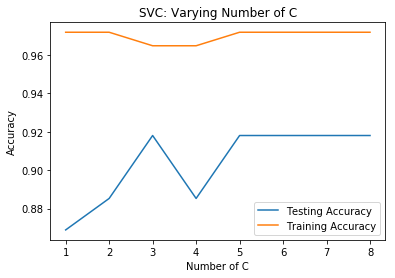

In [9]:
# Setup arrays to store train and test accuracies
C = np.arange(1, 9)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))

# Loop over different values of k
for i, k in enumerate(C):
    # Setup a SVC Classifier with k C: svc
    svc = SVC(kernel = 'linear', C = k)

    # Fit the classifier to the training data
    svc.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = svc.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = svc.score(X_test, y_test)

# Generate plot
plt.title('SVC: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.show()

Create an SVC classifier named svc. Use a linear kernel and set C value to 5.

In [10]:
svc = SVC(kernel = 'linear', C = 5)

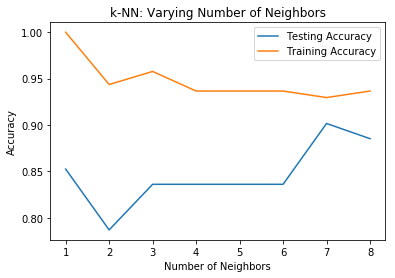

In [11]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Create an KNeighbors classifier named knn. Set the n_neighbor to 7

In [12]:
knn = KNeighborsClassifier(n_neighbors = 7)

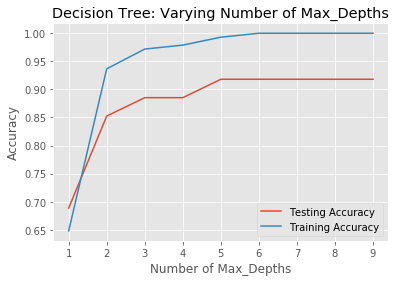

In [22]:
# Setup arrays to store train and test accuracies
max_depth = np.arange(1, 10)
train_accuracy = np.empty(len(max_depth))
test_accuracy = np.empty(len(max_depth))

# Loop over different values of k
for i, k in enumerate(max_depth):
    # Setup a DTree Classifier with k max_depth: dtree
    dtree = tree.DecisionTreeClassifier(max_depth = k, random_state = 2)

    # Fit the classifier to the training data
    dtree.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = dtree.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dtree.score(X_test, y_test)

# Generate plot
plt.title('Decision Tree: Varying Number of Max_Depths')
plt.plot(max_depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(max_depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Max_Depths')
plt.ylabel('Accuracy')
plt.show()

Create a decision tree classifier named dtree. Set its max_depth to 9 and random_state = 2 but do not alter any other setting.

In [14]:
dtree = tree.DecisionTreeClassifier(max_depth = 9, random_state = 2)

Make sure you add in the benchmark and drawPlots functions to our new classifier as well.



KNeighbors Results
5000 Iterations Training Time:  3.2015292644500732
5000 Iterations Scoring Time:  6.529195785522461
High-Dimensionality Score:  90.164


C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: 
.ix is deprecated. Please

Max 2D Score:  91.803


C:\Users\alloq\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


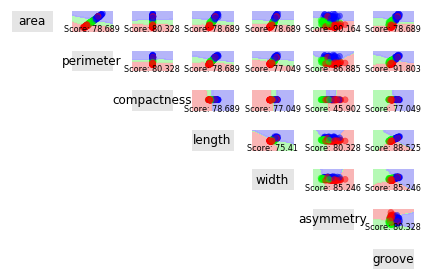

In [16]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')



SVC Results
5000 Iterations Training Time:  8.323639631271362
5000 Iterations Scoring Time:  2.427555799484253
High-Dimensionality Score:  91.803


C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: 
.ix is deprecated. Please

Max 2D Score:  90.164


C:\Users\alloq\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


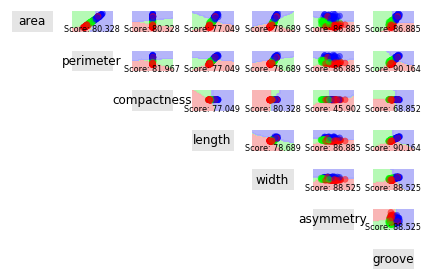

In [17]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')



Tree Results
5000 Iterations Training Time:  5.244665145874023
5000 Iterations Scoring Time:  1.9861221313476562
High-Dimensionality Score:  91.803


C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: 
.ix is deprecated. Please

Max 2D Score:  90.164


C:\Users\alloq\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


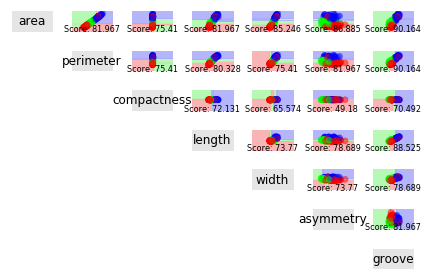

In [18]:
benchmark(dtree, X_train, X_test, y_train, y_test, 'Tree')
drawPlots(dtree, X_train, X_test, y_train, y_test, 'Tree')

Lab Questions:
#1:  To make sure everyone is on the same page, irrespective of the parameters you had on assginment1.py, go ahead and make the following changes:

C = 1
kernel = 'linear'
iterations = 5000
n_neighbors = 5
max_depth = 9

Which of the following statements is true?

Answer: Decision Tree beat SVC's score in the original, high-D feature space, but SVC has the highest 2D score.

#2: Keep dropping the max_depth of the decision tree down until the high-dimensionality score is less than KNeighbors, and the stop. What is the max_depth value that you hit?

Answer: At max_depth value of 1, the High-Dimensionality score for Decision Tree is around 68 compare to KNN score of 83.607.
